In [5]:
import random
import matplotlib.pyplot as plt

def fuzz(k):
    return k * random.gauss(0,1)

def make_data(alpha, beta, n=100, k=0.7):
    x = [random.uniform(-3,3) for _ in range(n)]
    y = [xi * beta + alpha + fuzz(k) for xi in x]
    return x, y

def mean(x):
    return sum(x)/len(x)

def ss(xm, x):
    return sum([(xi - xm)**2 for xi in x])

def standard_deviation(x):
    xm = mean(x)
    ssx = ss(xm, x)
    return (ssx / len(x))**0.5

def correlation(x, y):
    xm, ym = mean(x), mean(y)
    ssx, ssy = ss(xm, x), ss(ym, y)
    sscross = sum([(xi - xm)*(yi - ym) for xi, yi in zip(x, y)])
    return sscross / (ssx * ssy)**0.5
    
def linreg(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta


true params: (-5, 3)
est params: (-5.071968128126548, 2.960021059009583)


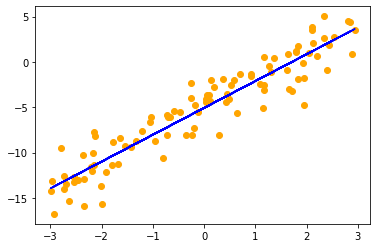

In [9]:
a, b = -5, 3
x, y = make_data(a, b, k=2)
alpha, beta = linreg(x, y)
plt.scatter(x, y, color='orange')
plt.plot(x, [xi * beta + alpha for xi in x], color='blue')
print(f"true params: {(a, b)}")
print(f"est params: {(alpha, beta)}")